<a href="https://colab.research.google.com/github/AatkaMeraj/Colab-Notebooks/blob/main/Colab-Notebooks/Jamboree_Education(Aatka_Meraj_DSML_Mar_23).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ABOUT JAMBOREE

**Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.**

**DOWNLOADING THE DATASET & IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import make_pipeline

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv


--2024-02-08 00:52:26--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.61, 18.172.139.46, 18.172.139.94, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree_Admission.csv.1’

Jamboree_Admission. 100%[===================>]  15.80K  --.-KB/s    in 0s      

2024-02-08 00:52:26 (33.0 MB/s) - ‘Jamboree_Admission.csv.1’ saved [16176/16176]



In [ ]:
df = pd.read_csv("Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**DATA PRE PROCSSING & EXPLORATORY DATA ANALYSIS**

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.shape


(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    500
dtype: int64

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.drop('Serial No.', axis = 1, inplace = True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


**UNIVARIATE ANALYSIS**

**ANALYSIS OF NUMERICAL COLUMNS**

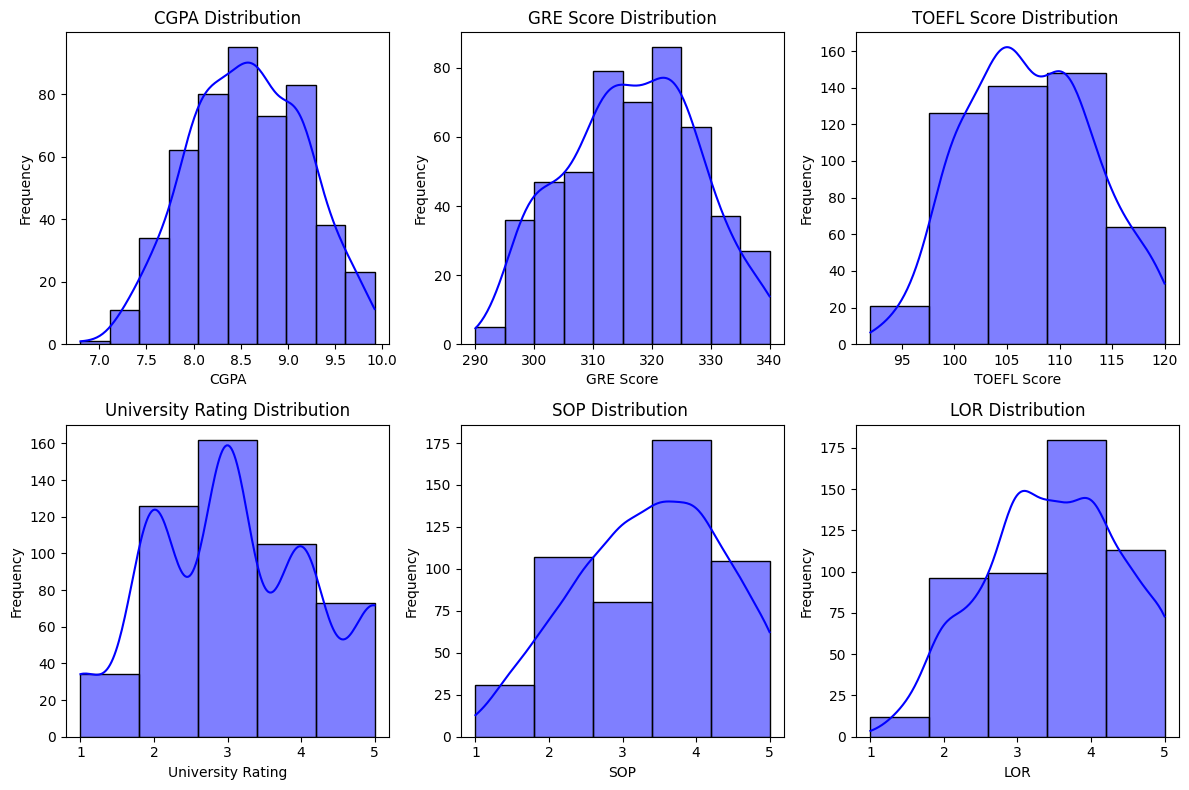

In [ ]:
# distribution of numrical variables

fig, axs = plt.subplots(2, 3, figsize=(12,8))

# histogram for CGPA
sns.histplot(df['CGPA'], bins=10, color='blue', edgecolor='black', kde=True, ax=axs[0, 0])
axs[0, 0].set_title('CGPA Distribution')
axs[0, 0].set_xlabel('CGPA')
axs[0, 0].set_ylabel('Frequency')

# histogram for GRE Score
sns.histplot(df['GRE Score'], bins=10, color='blue', edgecolor='black', kde=True, ax=axs[0, 1])
axs[0, 1].set_title('GRE Score Distribution')
axs[0, 1].set_xlabel('GRE Score')
axs[0, 1].set_ylabel('Frequency')

# histogram for TOEFL Score
sns.histplot(df['TOEFL Score'], bins=5, color='blue', edgecolor='black', kde=True, ax=axs[0, 2])
axs[0, 2].set_title('TOEFL Score Distribution ')
axs[0, 2].set_xlabel('TOEFL Score')
axs[0, 2].set_ylabel('Frequency')

# histogram for University Rating
sns.histplot(df['University Rating'], bins=5, color='blue', edgecolor='black', kde=True, ax=axs[1, 0])
axs[1, 0].set_title('University Rating Distribution')
axs[1, 0].set_xlabel('University Rating')
axs[1, 0].set_ylabel('Frequency')

# histogram for SOP
sns.histplot(df['SOP'], bins=5, color='blue', edgecolor='black', kde=True, ax=axs[1, 1])
axs[1, 1].set_title('SOP Distribution ')
axs[1, 1].set_xlabel('SOP')
axs[1, 1].set_ylabel('Frequency')

# histogram for LOR
sns.histplot(df['LOR '], bins=5, color='blue', edgecolor='black', kde=True, ax=axs[1, 2])
axs[1, 2].set_title('LOR Distribution')
axs[1, 2].set_xlabel('LOR')
axs[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Maximum CGPA is around 8.0 to 8.5, there is good number of CGPA over 9 also.**

**GRE Score ranges mostly from 310 to 325.**

**TOEFL Score lies mostly between 100 to 115.**

**Maximum University Rating is 3.**

**Maximum SOP and LOR is around 3.4 to 4.**



**ANALYSIS OF CATEGORICAL COLUMNS**

**BIVARIATE ANALYSIS**

In [ ]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


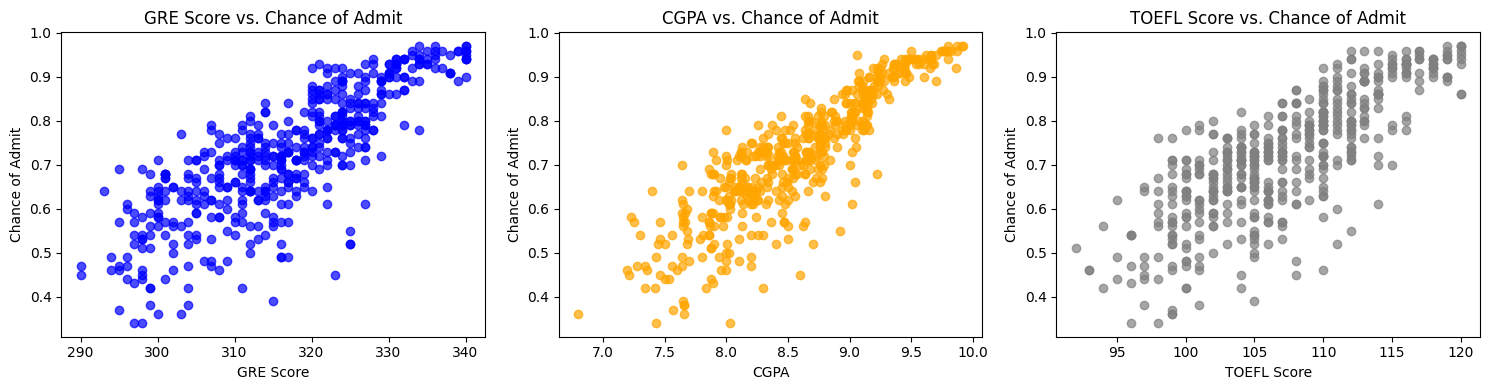

In [ ]:
#comparison of varoius features with target variable

fig, axs = plt.subplots(1, 3, figsize=(15,4))

# Scatter plot for GRE Score vs. chance of admit
axs[0].scatter( df['GRE Score'], df['Chance of Admit '], color='blue', alpha=0.7)
axs[0].set_title('GRE Score vs. Chance of Admit')
axs[0].set_xlabel('GRE Score')
axs[0].set_ylabel('Chance of Admit')

# Scatter plot for CGPA vs. chance of admit
axs[1].scatter( df['CGPA'], df['Chance of Admit '], color='orange', alpha=0.7)
axs[1].set_title('CGPA vs. Chance of Admit')
axs[1].set_xlabel('CGPA')
axs[1].set_ylabel('Chance of Admit')

# Scatter plot for TOEFL Score vs. Chance of Admit
axs[2].scatter(df['TOEFL Score'], df['Chance of Admit '], color='gray', alpha=0.7)
axs[2].set_title('TOEFL Score vs. Chance of Admit')
axs[2].set_xlabel('TOEFL Score')
axs[2].set_ylabel('Chance of Admit')

plt.tight_layout()
plt.show()


**Chance of Admit greatly depends on GRE Score, CGPA and TOEFL Score.**

**OUTLIER CHECK**

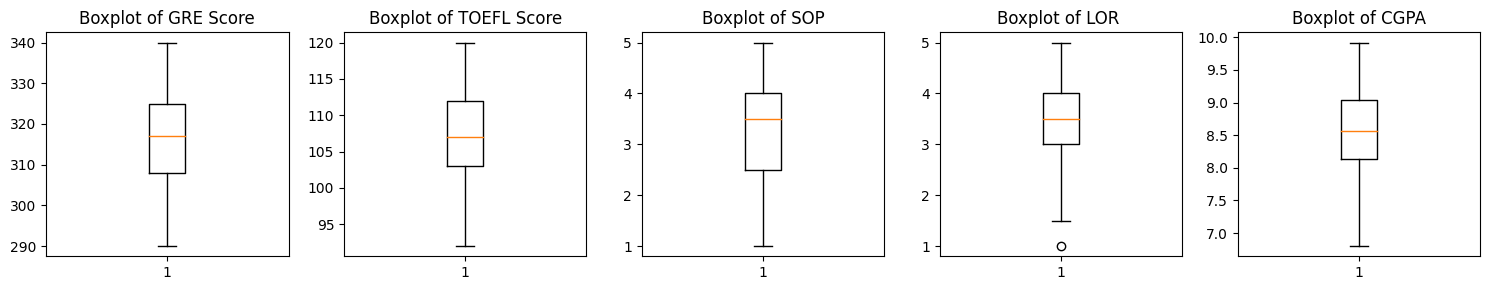

In [ ]:
data = df[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']]

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

# Create boxplots for each data set
for i, column in enumerate(data.columns):
    axes[i].boxplot(data[column])
    axes[i].set_title(f'Boxplot of {column}')

# adjusting layout and printing
plt.tight_layout()
plt.show()



In [ ]:
#splitting columns into features and target variable
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [ ]:
# split into train, validation and test data

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25, random_state=1)

In [ ]:
X_train.shape

(300, 7)

In [ ]:
X_val.shape

(100, 7)

In [ ]:
X_test.shape

(100, 7)

In [ ]:
# function to create adjusted R2 score

def adj_r2(X,y, r2):
  score = (1- ((1-r2)*(len(Y)-1))/(len(Y)-X.shape[1]-1))
  return score